Here we will try to build a hierarchical regression model, where each component (i.e. dimension) is normally distributed.  In microbial ecology, we are creating this generative model, because we expect microbes to be normally distributed around an optimal environment.  For instance, microbes have been noted to only exist in specific pH ranges.

The model that we are trying to build is parametered as follows

$$ x_j \sim N(u_j, \sigma_j)$$

where $x_i$ is the $i_{th}$ species, that is distributed around $u_i$, which is a value

$$ u \; |\; G \sim N(G\beta,\; \Sigma_G)$$

Let's first try to simulate some data, and see if we can fit it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson, multinomial, multivariate_normal
%matplotlib inline

In [4]:
num_samples = 50
num_features = 20
gradient = np.linspace(0, 10, num_samples)
mu = np.linspace(0, 10, num_features)
sigma = 2
xs = [norm.pdf(gradient, loc=mu[i], scale=sigma)
      for i in range(len(mu))]
table = np.vstack(xs).T

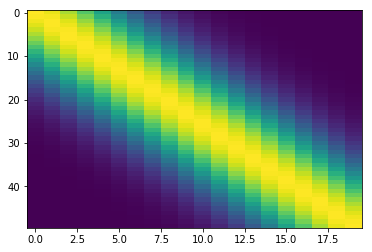

In [13]:
plt.imshow(table, aspect='auto', interpolation='nearest')

Here, we expect $\beta \approx \frac{100}{10}$.  Let's attempt to parameterize our model below.

In [32]:
import pystan

#----------------------------------------------
# Create the Stan model
#  this is done by defining a string of Stan code.

fit_code = open('model.stan', 'r').read()

In [33]:
# perform the fit
fit_data = {'N': len(gradient), 'D': table.shape[1], 'x': table.T, 'g': gradient}
fit = pystan.stan(model_code=fit_code, data=fit_data, iter=25000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bf2ff2c5bdff7bc0d53da1c6d149a738 NOW.


In [38]:
traces = fit.extract()

In [47]:
traces['mu'][5000:, :].mean(axis=0)

array([ 5.00000005,  5.00000005,  5.00000005,  5.00000004,  5.00000003,
        5.00000002,  5.00000001,  5.00000001,  5.        ,  5.        ,
        5.        ,  4.99999999,  4.99999999,  4.99999998,  4.99999998,
        4.99999997,  4.99999996,  4.99999996,  4.99999995,  4.99999995])

In [25]:
traces['u'].mean(axis=0)

array([ 0.06367341,  0.07074737,  0.07676219,  0.08039202,  0.08370377,
        0.07501824,  0.08325776,  0.07569326,  0.07581956,  0.0719533 ])